### Code to generate trajectories (Beta!)
#### 2021 01 20 CJH

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import telemetry_plot_utils as tpu 
import glob

---
#### making trajectories by hand - neds a lot of points on the corners

In [4]:
path_weaver_files = data_files = glob.glob('../robot/pathweaver/paths/*')
path_weaver_files

['../robot/pathweaver/paths\\barrel_pw0',
 '../robot/pathweaver/paths\\barrel_pw1',
 '../robot/pathweaver/paths\\barrel_test',
 '../robot/pathweaver/paths\\bounce_pw0',
 '../robot/pathweaver/paths\\bounce_pw1',
 '../robot/pathweaver/paths\\bounce_pw2',
 '../robot/pathweaver/paths\\bounce_pw3',
 '../robot/pathweaver/paths\\bounce_pw4',
 '../robot/pathweaver/paths\\calibrate',
 '../robot/pathweaver/paths\\calibrate_rev',
 '../robot/pathweaver/paths\\slalom_cjh_fast',
 '../robot/pathweaver/paths\\slalom_cjh_slow',
 '../robot/pathweaver/paths\\slalom_pw0']

In [5]:
df_points = tpu.get_points_df(name='slalom_cjh_fast')
df_points.head()

,X,Y,Tangent X,Tangent Y,Fixed Theta,Reversed,Name
0,1.100000,0.686751,0.520091,0.006372,True,False,NaN
1,2.098016,0.928900,0.210287,0.312245,True,False,NaN
2,2.646037,1.833772,0.385870,0.478197,False,False,NaN
3,3.206803,2.400910,0.312245,0.223032,True,False,NaN
4,3.773941,2.732271,0.560766,0.159308,True,False,NaN


In [9]:
# generate translation waypoints 
def waypoints_from_path(file):
    out = ""
    df_points = tpu.get_points_df(name=file)
    for ix, i in enumerate(zip(df_points['X'],df_slalolm['Y'])):
        out = out+ f"geo.Translation2d({i[0]:2.2f}, {i[1]:2.2f}), "
        if (ix-2) % 3 == 0:
            out= out+ '\n'
    print(out)

In [12]:
file = 'slalom_cjh_fast'
waypoints_from_path(file)

geo.Translation2d(1.10, 0.91), geo.Translation2d(2.10, 1.37), geo.Translation2d(2.65, 2.61), 
geo.Translation2d(3.21, 2.81), geo.Translation2d(3.77, 1.96), geo.Translation2d(5.72, 1.21), 
geo.Translation2d(6.42, 1.11), geo.Translation2d(7.11, 2.40), geo.Translation2d(8.27, 2.72), 
geo.Translation2d(8.67, 2.38), geo.Translation2d(8.36, 1.74), geo.Translation2d(7.48, 1.07), 
geo.Translation2d(7.06, 0.85), geo.Translation2d(6.39, 1.23), geo.Translation2d(5.05, 2.26), 
geo.Translation2d(3.26, 2.59), geo.Translation2d(2.65, 2.66), 


In [13]:
file = 'slalom_cjh_slow'
waypoints_from_path(file)

geo.Translation2d(1.10, 0.91), geo.Translation2d(2.10, 1.37), geo.Translation2d(2.65, 2.61), 
geo.Translation2d(3.21, 2.81), geo.Translation2d(3.77, 1.96), geo.Translation2d(5.72, 1.21), 
geo.Translation2d(6.42, 1.11), geo.Translation2d(7.11, 2.40), geo.Translation2d(7.99, 2.72), 
geo.Translation2d(8.53, 2.38), geo.Translation2d(8.34, 1.74), geo.Translation2d(7.48, 1.07), 
geo.Translation2d(7.06, 0.85), geo.Translation2d(6.53, 1.23), geo.Translation2d(4.72, 2.26), 
geo.Translation2d(3.26, 2.59), geo.Translation2d(2.65, 2.66), 


In [6]:
# copy x,y,angle data from the smartdash and make a list of them
x_offset, y_offset = 1.2, 0.9
# points used to generate trajectory
plist = [(1.520012,0.910000,0.000000), (2.447216,1.374044,59.807731), (3.359672,2.612377,39.789710), 
         (5.942630,2.809398,0.000000), (6.944320,1.960623,-69.456607), 
         (7.255449,1.207945,0.000000), (8.605512,1.105526,36.654595), 
         (8.717240,2.399724,131.803625), (8.173342,2.724106,178.791021), 
         (7.302003,2.381102,-117.243430), (7.065360,1.737164,-116.747003),
         (6.497403,1.066788,-146.158568), (4.970436,0.852641,178.906396), 
         (3.005862,1.234382,136.592009), (2.316865,2.258568,131.932310),
         (1.423031,2.593755,-179.951353), (1.054474,2.660425,179.761362)]
df_slalolm = pd.DataFrame(plist, columns=['X', 'Y', 'THETA'])
df_slalolm['X_NEW'] = df_slalolm['X'] - x_offset
df_slalolm['Y_NEW'] = df_slalolm['Y'] - y_offset
df_slalolm['RAD'] = df_slalolm['THETA']*3.1415/180
df_slalolm.round(2).head()

,X,Y,THETA,X_NEW,Y_NEW,RAD
0,1.52,0.91,0.00,0.32,0.01,0.00
1,2.45,1.37,59.81,1.25,0.47,1.04
2,3.36,2.61,39.79,2.16,1.71,0.69
3,5.94,2.81,0.00,4.74,1.91,0.00
4,6.94,1.96,-69.46,5.74,1.06,-1.21


In [3]:
# generate translation waypoints 
x_offset, y_offset = 1.2, 0.9
out = ""
for ix, i in enumerate(zip(df_slalolm['X_NEW'],df_slalolm['Y_NEW'])):
    out = out+ f"geo.Translation2d({i[0]:2.2f}, {i[1]:2.2f}), "
    if (ix-2) % 3 == 0:
        out= out+ '\n'
print(out)

geo.Translation2d(0.32, 0.01), geo.Translation2d(1.25, 0.47), geo.Translation2d(2.16, 1.71), 
geo.Translation2d(4.74, 1.91), geo.Translation2d(5.74, 1.06), geo.Translation2d(6.06, 0.31), 
geo.Translation2d(7.41, 0.21), geo.Translation2d(7.52, 1.50), geo.Translation2d(6.97, 1.82), 
geo.Translation2d(6.10, 1.48), geo.Translation2d(5.87, 0.84), geo.Translation2d(5.30, 0.17), 
geo.Translation2d(3.77, -0.05), geo.Translation2d(1.81, 0.33), geo.Translation2d(1.12, 1.36), 
geo.Translation2d(0.22, 1.69), geo.Translation2d(-0.15, 1.76), 


In [4]:
# generate poses
# simple loop test - see that it works and help to tune constants
plist = [(1.287243,0.919311,0.000000), (7.367178,1.058972,0.000000), (8.819659,1.766591,91.521775), 
         (7.255449,2.651115,179.934763), (1.408283,2.604561,179.934763) ]
df_slalolm = pd.DataFrame(plist, columns=['X', 'Y', 'THETA'])
df_slalolm['X_NEW'] = df_slalolm['X'] - x_offset
df_slalolm['Y_NEW'] = df_slalolm['Y'] - y_offset
df_slalolm['RAD'] = df_slalolm['THETA']*3.1415/180
df_slalolm.round(2)

,X,Y,THETA,X_NEW,Y_NEW,RAD
0,1.29,0.92,0.00,0.09,0.02,0.00
1,7.37,1.06,0.00,6.17,0.16,0.00
2,8.82,1.77,91.52,7.62,0.87,1.60
3,7.26,2.65,179.93,6.06,1.75,3.14
4,1.41,2.60,179.93,0.21,1.70,3.14


In [5]:
# generate pose waypoints
out = ""
for ix, i in enumerate(zip(df_slalolm['X_NEW'],df_slalolm['Y_NEW'],df_slalolm['RAD'])):
    out = out+ f"geo.Pose2d({i[0]:2.2f}, {i[1]:2.2f}, geo.Rotation2d({i[2]:2.2f})), "
    if (ix) % 2 == 0:
        out= out+ '\n'
print(out)

geo.Pose2d(0.09, 0.02, geo.Rotation2d(0.00)), 
geo.Pose2d(6.17, 0.16, geo.Rotation2d(0.00)), geo.Pose2d(7.62, 0.87, geo.Rotation2d(1.60)), 
geo.Pose2d(6.06, 1.75, geo.Rotation2d(3.14)), geo.Pose2d(0.21, 1.70, geo.Rotation2d(3.14)), 



---
#### Measure the feed forward parameters to characterize the drivetrain

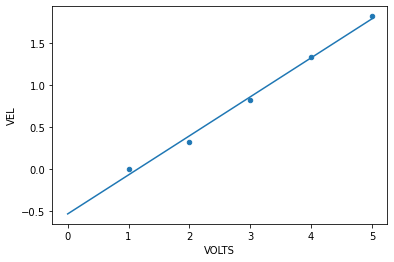

In [6]:
# feed forward - run at a fixed voltage and measure the velocity, generate the intercept and slope for the SimpleMotorFeedForward object
ff_x = [1, 2,    3,    4,    5]
ff_y = [0, 0.33, 0.83, 1.33,  1.82]

df_pid = pd.DataFrame({'VOLTS':ff_x, 'VEL':ff_y})
ax = df_pid.plot('VOLTS', 'VEL', kind='scatter')

par = np.polyfit(ff_x, ff_y, 1, full=True)
slope=par[0][0]
intercept=par[0][1]
xl = np.linspace(0,5,51)
yl = slope*xl + intercept

plt.plot(xl,yl)

In [7]:
ks = -intercept/slope
kv = 1/slope
ks, kv

(1.1422413793103465, 2.155172413793103)

---
#### Fitting some distance data - not necessary now that encoders are fixed

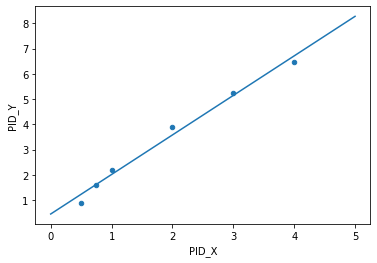

In [8]:
# this used 
pid_x = np.array([0.5,  0.75,  1,    2,    3,    4  ])
pid_y = np.array([0.88, 1.62,  2.20, 3.89, 5.25, 6.48])

df_pid = pd.DataFrame({'PID_X':pid_x, 'PID_Y':pid_y})
ax = df_pid.plot('PID_X', 'PID_Y', kind='scatter')

par = np.polyfit(pid_x, pid_y, 1, full=True)
slope=par[0][0]
intercept=par[0][1]
xl = np.linspace(0,5,51)
yl = slope*xl + intercept

plt.plot(xl,yl)

In [9]:
example = [{'points': 50, 'time': '5:00', 'year': 2010}, 
{'points': 25, 'time': '6:00', 'month': "february"}, 
{'points':90, 'time': '9:00', 'month': 'january'}, 
{'points_h1':20, 'month': 'june'}]
pd.DataFrame(example)

,points,time,year,month,points_h1
0,50.0,5:00,2010.0,NaN,NaN
1,25.0,6:00,NaN,february,NaN
2,90.0,9:00,NaN,january,NaN
3,NaN,NaN,NaN,june,20.0


In [10]:
import glob
from pathlib import Path
def get_pathweaver_generators():
    path_files = glob.glob('../robot/pathweaver/paths/*', recursive=True)
    path_names = [Path(file).name for file in path_files]
    return path_names
get_pathweaver_generators()

['barrel_pw0',
 'barrel_pw1',
 'bounce_pw0',
 'bounce_pw1',
 'bounce_pw2',
 'bounce_pw3',
 'calibrate',
 'calibrate_rev',
 'slalom_cjh_fast',
 'slalom_cjh_slow',
 'slalom_pw0']

In [11]:
def get_pathweaver_json():
    path_files = glob.glob('../robot/pathweaver/vel_0p75/output/*.json', recursive=True)
    path_names = [Path(file).name for file in path_files]
    return path_files
js = get_pathweaver_json()
js

['../robot/pathweaver/vel_0p75/output\\barrel_pw0.wpilib.json',
 '../robot/pathweaver/vel_0p75/output\\barrel_pw1.wpilib.json',
 '../robot/pathweaver/vel_0p75/output\\bounce_pw0.wpilib.json',
 '../robot/pathweaver/vel_0p75/output\\bounce_pw1.wpilib.json',
 '../robot/pathweaver/vel_0p75/output\\bounce_pw2.wpilib.json',
 '../robot/pathweaver/vel_0p75/output\\bounce_pw3.wpilib.json',
 '../robot/pathweaver/vel_0p75/output\\calibrate.wpilib.json',
 '../robot/pathweaver/vel_0p75/output\\calibrate_rev.wpilib.json',
 '../robot/pathweaver/vel_0p75/output\\slalom_cjh_fast.wpilib.json',
 '../robot/pathweaver/vel_0p75/output\\slalom_cjh_slow.wpilib.json',
 '../robot/pathweaver/vel_0p75/output\\slalom_pw0.wpilib.json']

#### read the pathweaver trajectory generation on the fwd and rev of calibrate
* conclusion: reverse on pathwever 
  * has the same x and y
  * reverses the velocity, acceleration and curvature 
  * flips the direction the robot is facing

In [12]:
df = pd.read_json(js[6])
df['ROT'] = [df.at[i,'pose']['rotation']['radians'] for i, row in df.iterrows()]
df

,time,velocity,acceleration,pose,curvature,ROT
0,0.000000,0.000000,1.000000,"{'translation': {'x': 0.0030459693537640002, '...",0.000000e+00,-1.075227e-02
1,0.204429,0.204429,1.000000,"{'translation': {'x': 0.023941411286754002, 'y...",2.198783e+00,1.336314e-02
2,0.290462,0.290462,0.611134,"{'translation': {'x': 0.045210482646124005, 'y...",3.649512e+00,7.717842e-02
3,0.326696,0.312606,-0.241019,"{'translation': {'x': 0.05608402852317201, 'y'...",4.055617e+00,1.194763e-01
4,0.363002,0.303855,-0.019569,"{'translation': {'x': 0.06716105701824601, 'y'...",4.255885e+00,1.661746e-01
...,...,...,...,...,...,...
132,14.837078,0.499983,-1.000000,"{'translation': {'x': 9.017516504699099, 'y': ...",-1.254283e+00,2.604170e-01
133,14.910513,0.426547,-1.000000,"{'translation': {'x': 9.050593955378034, 'y': ...",-1.880636e+00,2.079385e-01
134,14.982512,0.354548,-1.000000,"{'translation': {'x': 9.078267523807314, 'y': ...",-2.599270e+00,1.451601e-01
135,15.056719,0.280342,-1.000000,"{'translation': {'x': 9.101675173612602, 'y': ...",-2.971478e+00,7.825720e-02


In [13]:
df = pd.read_json(js[7])
df['ROT'] = [df.at[i,'pose']['rotation']['radians'] for i, row in df.iterrows()]
df

,time,velocity,acceleration,pose,curvature,ROT
0,0.000000,-0.000000,-1.000000,"{'translation': {'x': 0.0030459693537640002, '...",-0.000000e+00,3.130840
1,0.204429,-0.204429,-1.000000,"{'translation': {'x': 0.023941411286754002, 'y...",-2.198783e+00,-3.128230
2,0.290462,-0.290462,-0.611134,"{'translation': {'x': 0.045210482646124005, 'y...",-3.649512e+00,-3.064414
3,0.326696,-0.312606,0.241019,"{'translation': {'x': 0.05608402852317201, 'y'...",-4.055617e+00,-3.022116
4,0.363002,-0.303855,0.019569,"{'translation': {'x': 0.06716105701824601, 'y'...",-4.255885e+00,-2.975418
...,...,...,...,...,...,...
132,14.837078,-0.499983,1.000000,"{'translation': {'x': 9.017516504699099, 'y': ...",1.254283e+00,-2.881176
133,14.910513,-0.426547,1.000000,"{'translation': {'x': 9.050593955378034, 'y': ...",1.880636e+00,-2.933654
134,14.982512,-0.354548,1.000000,"{'translation': {'x': 9.078267523807314, 'y': ...",2.599270e+00,-2.996433
135,15.056719,-0.280342,1.000000,"{'translation': {'x': 9.101675173612602, 'y': ...",2.971478e+00,-3.063335


In [14]:
pwd

'C:\\Cory\\CJH Shared\\Python\\FRC\\2021\\notebooks'

In [15]:
cd ..

C:\Cory\CJH Shared\Python\FRC\2021


In [16]:
cd robot

C:\Cory\CJH Shared\Python\FRC\2021\robot


#### use the trajectory generation to try the fwd and rev of calibrate
* conclusion: it only reverses velocity and acceleration, not the rotation nor the curvature... 
* BUT if you use the reversed pathweaver and trajectory_config reversed it is matches the pathweaver trajectory

In [74]:
import wpimath.spline
import wpimath.trajectory

drive_kinematics = wpimath.kinematics.DifferentialDriveKinematics(0.69)
def generate_trajectory(path_name, velocity=2, reset_pose=True, reverse=True, save=False):
    pathweaver_y_offfset = 4.572
    p = Path('../robot/pathweaver/paths/' + path_name)
    if p.is_file():
        # pandas approach - best not to put this on the robot
        #df_points = pd.read_csv(p, sep=',', header='infer')  # ToDo: do this without pandas
        #cvector_list = [wpimath.spline.Spline5.ControlVector((row['X'], row['Tangent X'], 0),(row['Y'] + pathweaver_y_offfset, row['Tangent Y'], 0)) for ix, row in df_points.iterrows()]
        lines = []
        with open(p, "r") as f:
            for line in f:
                currentline = line.split(",")
                lines.append(currentline)

        cvector_list = [wpimath.spline.Spline5.ControlVector((float(row[0]), float(row[2]), 0), (float(row[1]) + pathweaver_y_offfset, float(row[3]), 0))
                        for ix, row in enumerate(lines[1:])]

        config = wpimath.trajectory.TrajectoryConfig(velocity, 1)
        config.setKinematics(drive_kinematics)
        reverse_array = [row[5]=='true' for row in lines[1:]]
        if (any(entry for entry in reverse_array)):
            config.setReversed(reverse)
        #config.addConstraint(autonomous_voltage_constraint)
        pw_trajectory = wpimath.trajectory.TrajectoryGenerator.generateTrajectory(cvector_list, config)
        if save:
            wpimath.trajectory.TrajectoryUtil.toPathweaverJson(pw_trajectory, 'pathweaver\\test.json')
    else:
        pw_trajectory = None  # do something else
    return pw_trajectory

In [75]:
traj_f = generate_trajectory('calibrate', 0.75, reverse=False)

In [76]:
traj_r = generate_trajectory('calibrate_rev', 0.75, reverse=True)

In [77]:
traj = traj_r
x = [state.pose.X() for state in traj.states()]
y = [state.pose.Y() for state in traj.states()]
v = [state.velocity for state in traj.states()]
acc = [state.acceleration for state in traj.states()]
cur = [state.curvature for state in traj.states()]
rot = [state.pose.rotation().radians() for state in traj.states()]
df_rev = pd.DataFrame(zip(x,y,v,rot,acc,cur), columns=['x','y','vel', 'rot', 'acc', 'cur'])
df_rev

,x,y,vel,rot,acc,cur
0,0.003046,0.025084,-0.000000,3.130840,-1.000000,-0.000000e+00
1,0.023941,0.025032,-0.204429,-3.128230,-1.000000,-2.198783e+00
2,0.045210,0.025940,-0.290462,-3.064414,-0.611134,-3.649512e+00
3,0.056084,0.027009,-0.312606,-3.022116,0.241019,-4.055617e+00
4,0.067161,0.028600,-0.303855,-2.975418,0.019569,-4.255885e+00
...,...,...,...,...,...,...
132,9.017517,4.545052,-0.499983,-2.881176,1.000000,1.254283e+00
133,9.050594,4.553005,-0.426547,-2.933654,1.000000,1.880636e+00
134,9.078268,4.557991,-0.354548,-2.996433,1.000000,2.599270e+00
135,9.101675,4.560635,-0.280342,-3.063335,1.000000,2.971478e+00


In [78]:
traj = traj_f
x = [state.pose.X() for state in traj.states()]
y = [state.pose.Y() for state in traj.states()]
v = [state.velocity for state in traj.states()]
acc = [state.acceleration for state in traj.states()]
cur = [state.curvature for state in traj.states()]
rot = [state.pose.rotation().radians() for state in traj.states()]
df_fwd = pd.DataFrame(zip(x,y,v,rot,acc,cur), columns=['x','y','vel', 'rot', 'acc', 'cur'])
df_fwd

,x,y,vel,rot,acc,cur
0,0.003046,0.025084,0.000000,-1.075227e-02,1.000000,0.000000e+00
1,0.023941,0.025032,0.204429,1.336314e-02,1.000000,2.198783e+00
2,0.045210,0.025940,0.290462,7.717842e-02,0.611134,3.649512e+00
3,0.056084,0.027009,0.312606,1.194763e-01,-0.241019,4.055617e+00
4,0.067161,0.028600,0.303855,1.661746e-01,-0.019569,4.255885e+00
...,...,...,...,...,...,...
132,9.017517,4.545052,0.499983,2.604170e-01,-1.000000,-1.254283e+00
133,9.050594,4.553005,0.426547,2.079385e-01,-1.000000,-1.880636e+00
134,9.078268,4.557991,0.354548,1.451601e-01,-1.000000,-2.599270e+00
135,9.101675,4.560635,0.280342,7.825720e-02,-1.000000,-2.971478e+00


In [79]:
df_rev['rot'] 

0      3.130840
1     -3.128230
2     -3.064414
3     -3.022116
4     -2.975418
         ...   
132   -2.881176
133   -2.933654
134   -2.996433
135   -3.063335
136   -3.141593
Name: rot, Length: 137, dtype: float64